In [6]:
import pandas as pd

df = pd.read_csv("blogs.csv")
df.head()



,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [8]:
df.describe()

,Data,Labels
count,2000,2000
unique,2000,20
top,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,alt.atheism
freq,1,100


<Axes: title={'center': 'Category Counts'}, xlabel='Labels'>

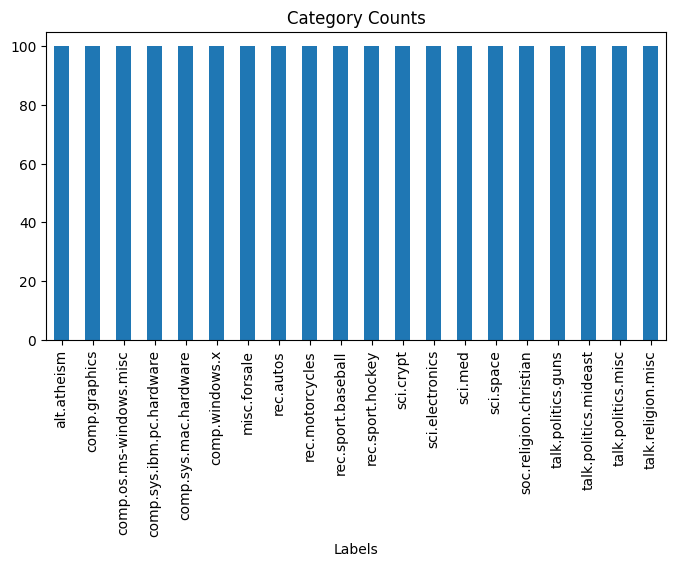

In [9]:
df['Labels'].value_counts().plot(kind='bar', figsize=(8,4), title='Category Counts')


In [12]:
import pandas as pd
import re
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

df = pd.read_csv("blogs.csv")

stop_words = ENGLISH_STOP_WORDS

def clean_text(text):
    text = text.lower()
    text = re.sub(r"\d+", "", text)                 # remove numbers
    text = text.translate(str.maketrans("", "", string.punctuation))  # remove punctuation
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

df["Clean_Data"] = df["Data"].apply(clean_text)
df.head()



,Data,Labels,Clean_Data
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,newsgroups altatheism path cantaloupesrvcscmue...
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,path cantaloupesrvcscmuedudasnewsharvardedunoc...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,xref cantaloupesrvcscmuedu altatheism talkreli...


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df["Clean_Data"]).toarray()
y = df["Labels"]


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [15]:
try:
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    analyzer = SentimentIntensityAnalyzer()

    def get_sentiment(text):
        score = analyzer.polarity_scores(text)["compound"]
        if score > 0.05:
            return "Positive"
        elif score < -0.05:
            return "Negative"
        else:
            return "Neutral"

except:
    # Option B: Simple rule-based fallback
    positive_words = ["good","great","excellent","love","happy","wonderful"]
    negative_words = ["bad","terrible","sad","angry","hate","poor"]

    def get_sentiment(text):
        text = text.lower()
        pos = sum(word in text for word in positive_words)
        neg = sum(word in text for word in negative_words)
        if pos > neg:
            return "Positive"
        elif neg > pos:
            return "Negative"
        else:
            return "Neutral"

df["Sentiment"] = df["Data"].apply(get_sentiment)
df.head()


,Data,Labels,Clean_Data,Sentiment
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...,Negative
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,newsgroups altatheism path cantaloupesrvcscmue...,Neutral
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,path cantaloupesrvcscmuedudasnewsharvardedunoc...,Negative
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...,Positive
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,xref cantaloupesrvcscmuedu altatheism talkreli...,Neutral


In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.85
Precision: 0.8528970729942597
Recall: 0.8574809226720992
F1 Score: 0.8467374086845627

Classification Report:

                          precision    recall  f1-score   support

             alt.atheism       0.56      0.83      0.67        18
           comp.graphics       0.71      0.83      0.77        18
 comp.os.ms-windows.misc       0.91      0.91      0.91        22
comp.sys.ibm.pc.hardware       0.84      0.84      0.84        25
   comp.sys.mac.hardware       0.87      0.95      0.91        21
          comp.windows.x       0.95      0.84      0.89        25
            misc.forsale       1.00      0.78      0.88        18
               rec.autos       0.90      1.00      0.95        18
         rec.motorcycles       1.00      0.94      0.97        16
      rec.sport.baseball       0.80      0.89      0.84        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.95      1.00      0.97        19
         sci.el

#### (1) What is Naive Bayes?

A probabilistic classifier based on Bayes’ Theorem assuming all features are independent. Works extremely well for text classification due to the bag-of-words model.

#### (2) Why is Naive Bayes good for text classification?

Very fast

Works well with high-dimensional data

Handles large vocabularies

Performs well even with small datasets

Uses word frequencies → perfect for text

#### (3) What is TF-IDF?

Term Frequency – Inverse Document Frequency
Measures how important a word is relative to a document:

High TF → frequent in document

High IDF → rare in other documents

TF-IDF helps highlight important words.

#### (4) What is sentiment analysis?

A Natural Language Processing technique that identifies whether text conveys:

Positive

Negative

Neutral sentiment

#### (5) Why use Multinomial Naive Bayes for text?

Because it works with word counts / TF-IDF scores, which are discrete and non-negative.